# 一.项目背景

<img src="picture/pic1.png" width="80%">

《绝地求生》PlayerUnknown的Battlegrounds（PUBG）是一款战术竞技型大逃杀生存游戏。
在该游戏中，玩家通过随机或自行组队（每队最多4人）从飞机上空投到岛上不同位置，在城镇和建筑物中收集各种武器、弹药、护甲和医疗用品等资源，并在不断缩小的安全区域内对抗击杀其他玩家，让自己或团队队友生存到最后 。

本项目目的：
* 通过探索性分析提高《绝地求生》中的吃鸡概率，研究游戏内对吃鸡有用的策略、游戏道具和游戏方式。
* 建立模型分析玩家吃鸡的相关性因素。

# 二.需求分析和数据集准备

## 需求分析
* 游戏行为分析：
  * 游戏哪里的位置降落更容易落地成盒？跳那里比较安全？
  * 为了成功“吃鸡”，什么武器最有用？
  * 近战适合使用什么武器，狙击适合使用什么武器？
  * 游戏内要不要乘坐交通工具，还是选择徒步更有利于“吃鸡”？
  * 我是该苟着不动，还是应该出去猛干？
  * 是该单打独斗还是跟队友一起配合？
  * 毒来了我跑不过毒怎么办啊？
  * 游戏最后的毒圈会出现在哪里？

* 游戏获胜的相关性分析：
  * 游戏内的玩家数据与“吃鸡”的相关性分析

## 数据集准备

* 分析语言：Python
* IDE：Jupyter Notebook
* 相关库：pandas、NumPy、Matplotlib、Seaborn
* 数据集来源：（kaggle数据科学社区）PUBG Finish Placement Prediction
* 数据集大小：pubg数据包括2个数据集
* 1）匿名玩家数据集（train_V2）共29列，100万条左右匿名玩家游戏数据，其中winPlacePerc为吃鸡的获胜结果。
  * 字段说明（共29个字段）
    * Id : 玩家ID
    * groupId : 队伍的ID
    * matchId : 比赛场次的ID
    * assists : 队友助攻击杀敌人的次数
    * DBNOs : 击倒多少敌人 
    * boosts : 使用的提升性物品的数量
    * damageDealt : 造成的总伤害-自己所受的伤害
    * headshotKills : 爆头击杀的敌人数量
    * heals : 使用的救援类物品数量
    * killPlace : 杀死敌人数量的排名
    * killPoints : 基于击杀的玩家外部排名。将其视为Elo排名，只有杀死才有意义。如果rankPoints中的值不是-1，那么killPoints中的任何0都应被视为“无”。
    * killStreaks : 短时间内杀死敌人的最大数量
    * kills : 杀死的敌人的数量
    * longestKill : 玩家和玩家在死亡时被杀的最长距离。 
    * matchDuration : 匹配用了多少秒
    * matchType :  单排/双排/四排
    * maxPlace : 在该局中已有数据的最差的队伍名词（可能与该局队伍数不匹配，因为数据收集有跳跃）
    * numGroups : 在该局比赛中有玩家数据的队伍数量
    * rankPoints : 类似Elo的玩家排名。 此排名不一致，并且在API的下一个版本中已弃用，因此请谨慎使用。值-1表示“无”。
    * revives : 玩家救援队友的次数
    * rideDistance : 玩家使用交通工具行驶距离
    * roadKills : 在交通工具上击杀的玩家数量
    * swimDistance : 游泳距离
    * teamKills : 该玩家杀死队友的次数
    * vehicleDestroys : 毁坏了多少交通工具
    * walkDistance : 步行距离
    * weaponsAcquired : 捡了多少把枪
    * winPoints : 基于赢的玩家外部排名。将其视为Elo排名，只有获胜才有意义。如果rankPoints中的值不是-1，那么winPoints中的任何0都应被视为“无”。
    * winPlacePerc : 获胜情况，是以百分数计算的，介于0-1之间，1对应第一名，0对应最后一名。
* 2）主要包含两个数据文件:
  * 一部分是玩家比赛的统计数据（aggregate数据集）： 包括各种综合统计数据，例如玩家死亡，伤害，步行距离等。
  * 一部分是玩家被击杀的数据（kill数据集）：包含了比赛中发生的每一次死亡事件的信息（被谁击杀、死亡地点、游戏排名等）。
  * 字段说明（共27个字段）
  * aggregate数据集：(15个字段）
    * date : 比赛时间
    * game_size : 游戏人数
    * match_id : 比赛id
    * match_mode : 游戏模式
    * party_size : 团队大小(分为2人、4人、1人)
    * player_assists : 助攻次数
    * player_dbno : 击倒人数(down but no out)
    * player_dist_ride : 驾车距离
    * player_dist_walk : 徒步距离
    * player_dmg : 输出伤害
    * player_kills : 玩家击杀
    * player_name : 玩家昵称
    * player_survive_time : 玩家存活时间
    * team_id : 团队id
    * team_placement : 团队排名
  * kill数据集：（12个字段）
    * killed_by : 被什么武器击杀
    * killer_name : 击杀者name
    * killer_placement : 击杀者游戏排名
    * killer_position_x : 击杀者所在位置x
    * killer_position_y': 击杀者所在位置y
    * map : 地图名
    * match_id : 比赛id
    * time : 比赛时间
    * victim_name : 被击杀者name
    * victim_placement : 被击杀者排名
    * victim_position_x : 被击杀者所在位置x
    * victim_position_y : 被击杀者所在位置y

# 三.数据预处理

## 导入数据&理解数据

In [5]:
#导入包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from scipy.ndimage.filters import gaussian_filter
from scipy.misc.pilutil import imread
from PIL import Image
# 设置中文
from matplotlib.font_manager import _rebuild
_rebuild()
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [6]:
# 获取匿名玩家数据
train_df=pd.read_csv('dataset/train_V2.csv')
# 获取游戏统计数据
agg_df = pd.read_csv('dataset/agg_match_stats_0.csv')
# 获取游戏击杀统计数据
kill_df = pd.read_csv('dataset/kill_match_stats_final_0.csv')

In [7]:
train_df.head(3)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755


In [8]:
agg_df.head(3)

,date,game_size,match_id,match_mode,party_size,player_assists,player_dbno,player_dist_ride,player_dist_walk,player_dmg,player_kills,player_name,player_survive_time,team_id,team_placement
0,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2870.72400,1784.847780,117,1,SnuffIes,1106.320,4,18
1,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,1,2938.40723,1756.079710,127,1,Ozon3r,1106.315,4,18
2,2017-11-26T20:59:40+0000,37,2U4GBNA0YmnNZYkzjkfgN4ev-hXSrak_BSey_YEG6kIuDG...,tpp,2,0,0,0.00000,224.157562,67,0,bovize,235.558,5,33


In [9]:
kill_df.head(3)

,killed_by,killer_name,killer_placement,killer_position_x,killer_position_y,map,match_id,time,victim_name,victim_placement,victim_position_x,victim_position_y
0,Grenade,KrazyPortuguese,5.0,657725.10,146275.2,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,823,KrazyPortuguese,5.0,657725.10,146275.2
1,SCAR-L,nide2Bxiaojiejie,31.0,93091.37,722236.4,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,194,X3evolution,33.0,92238.68,723375.1
2,S686,Ascholes,43.0,366921.40,421623.9,MIRAMAR,2U4GBNA0YmnLSqvEycnTjo-KT000vfUnhSA2vfVhVPe1QB...,103,CtrlZee,46.0,367304.50,421216.1


## 清洗数据

### aggregate和kill数据集清洗

In [10]:
# 游戏统计数据是否有缺失值
agg_df.isnull().sum()

date                       0
game_size                  0
match_id                   0
match_mode                 0
party_size                 0
player_assists             0
player_dbno                0
player_dist_ride           0
player_dist_walk           0
player_dmg                 0
player_kills               0
player_name            20249
player_survive_time        0
team_id                    0
team_placement             0
dtype: int64

玩家昵称的缺失值不影响分析，故可不处理。

In [11]:
# 击杀数据是否有缺失值
kill_df.isnull().sum()

killed_by                0
killer_name          73147
killer_placement     73147
killer_position_x    73147
killer_position_y    73147
map                  10868
match_id                 0
time                     0
victim_name              0
victim_placement     19986
victim_position_x        0
victim_position_y        0
dtype: int64

被击杀者的缺失值不影响分析，故仅处理killer_name，killer_placement，killer_position_x，killer_position_y和map的缺失值即可。

In [12]:
# 处理击杀数据的缺失值
kill_data=kill_df.dropna(axis="index",how='any',subset=['killer_name','killer_placement','killer_position_x','killer_position_y','map'])
# 处理玩家统计数据和击杀数据的重复值
agg_df.drop_duplicates(inplace= True)
kill_data.drop_duplicates(inplace= True)

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
agg_df.isnull().sum()

date                       0
game_size                  0
match_id                   0
match_mode                 0
party_size                 0
player_assists             0
player_dbno                0
player_dist_ride           0
player_dist_walk           0
player_dmg                 0
player_kills               0
player_name            20249
player_survive_time        0
team_id                    0
team_placement             0
dtype: int64

In [11]:
kill_data.isnull().sum()

killed_by                0
killer_name              0
killer_placement         0
killer_position_x        0
killer_position_y        0
map                      0
match_id                 0
time                     0
victim_name              0
victim_placement     18937
victim_position_x        0
victim_position_y        0
dtype: int64

### train数据集清洗

In [12]:
# 训练集数据是否有缺失值
train_df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [13]:
# 查看数据信息
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.331564e-01,1.107765e+00,1.308884e+02,6.586091e-01,2.269671e-01,1.368829e+00,4.760414e+01,5.060075e+02,9.255208e-01,5.443130e-01,...,1.644394e-01,6.073919e+02,3.498081e-03,4.512611e+00,2.397444e-02,7.865913e-03,1.155094e+03,3.660658e+00,6.077752e+02,4.727710e-01
std,5.884064e-01,1.716132e+00,1.713011e+02,1.147117e+00,5.990129e-01,2.676049e+00,2.747391e+01,6.276709e+02,1.560028e+00,7.115300e-01,...,4.705245e-01,1.498646e+03,7.382696e-02,3.048954e+01,1.685196e-01,9.216566e-02,1.184236e+03,2.457831e+00,7.399892e+02,3.075084e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.555000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.433000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.861000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,4.229500e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.977000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.100000e+01,3.300000e+01,6.616000e+03,3.800000e+01,4.000000e+01,6.300000e+01,1.000000e+02,2.152000e+03,6.500000e+01,1.400000e+01,...,1.900000e+01,3.397000e+04,9.000000e+00,2.718000e+03,1.000000e+01,4.000000e+00,2.578000e+04,1.280000e+02,2.001000e+03,1.000000e+00


# 四.探索性分析

## 游戏行为分析

### 问题1：跳哪里比较安全？

落地成盒对于游戏玩家体验比较差，在游戏内“落地成盒”意味着玩家从飞机跳伞后，存活时间少于3分钟就变成一个盒子。分析哪些位置是落地成盒热点区域，可以找到更安全的跳伞区域。
绝地求生的地图主要有沙漠地图（MIRAMAR）和经典海岛地图（ERANGEL）,下边是对应地图的“落地成盒”危险区：
* 解释位置数据：X，Y坐标全部在游戏内坐标中，需要线性缩放以在方形ERANGEL和MIRAMAR地图上绘制。最小，最大坐标分别为0,800000。

In [14]:
# 筛选落地成盒的玩家(选取开局180s之内死亡的玩家)
#游戏地图只有2种：['MIRAMAR', 'ERANGEL']，把最后毒圈的数据分地图储存
easy_dead_mrm = kill_data.loc[(kill_data['map']=='MIRAMAR') & (kill_data['time']<=180)]
easy_dead_era = kill_data.loc[(kill_data['map']=='ERANGEL') & (kill_data['time']<=180)]
#缩放被击杀者位置坐标值
data_era = easy_dead_era[['victim_position_x', 'victim_position_y']].values
data_mrm = easy_dead_mrm[['victim_position_x', 'victim_position_y']].values
data_era = data_era * 4096 / 800000
data_mrm = data_mrm * 1000 / 800000
#读取海岛地图和沙漠地图
era = imread('picture/erangel.jpg')
mrm = imread('picture/miramar.jpg')
def heatmap(x, y, s, bins=100):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    return heatmap.T, extent

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if sys.path[0] == '':


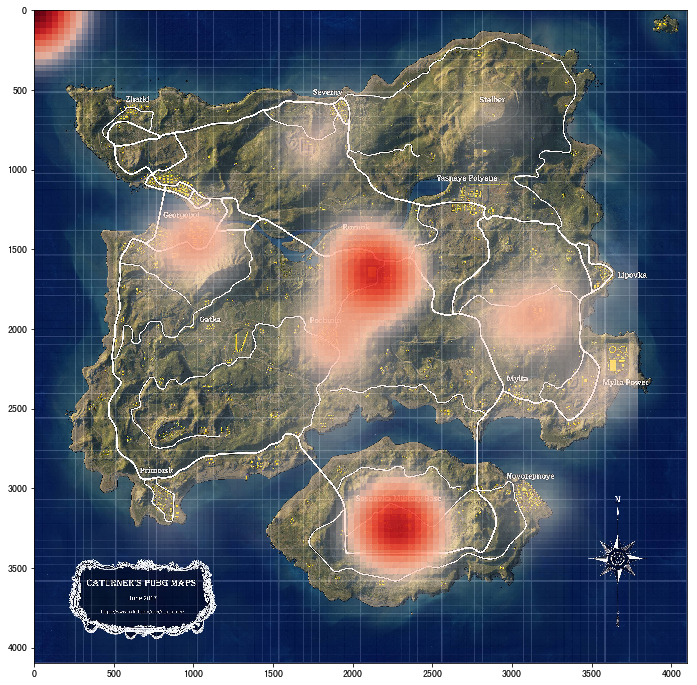

In [15]:
#绘制ERANGEL图(落地成盒)
hmap, extent = heatmap(data_era[:, 0], data_era[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Reds(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(0, 4096)
ax.set_ylim(0, 4096)
ax.imshow(era)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()

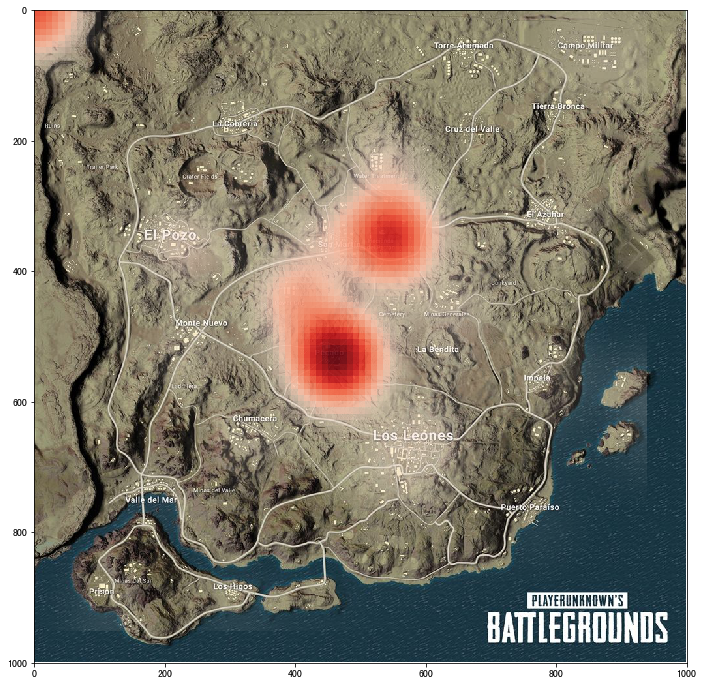

In [16]:
#绘制MIRAMAR图(落地成盒)
hmap, extent = heatmap(data_mrm[:, 0], data_mrm[:, 1], 4.5)
alphas = np.clip(Normalize(0, hmap.max(), clip=True)(hmap) * 4.5, 0.0, 1.)
colors = Normalize(0, hmap.max(), clip=True)(hmap)
colors = cm.Reds(colors)
colors[..., -1] = alphas

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(0, 1000)
ax.set_ylim(0, 1000)
ax.imshow(mrm)
ax.imshow(colors, extent=extent, origin='lower', cmap=cm.Reds, alpha=0.9)
plt.gca().invert_yaxis()

深红色的地方就是最危险的，
* 海岛地图上分别是军事基地、学校、P城、G港、防空洞，而沙漠地图最明显，扎堆两个地方：圣马丁城和皮卡多城。
* 那跳哪里是安全且资源又多的呢？ 海岛地图上Y城和P港就是常常被人群遗忘的地方，可以放心搜。其实也不难发现，海岸沿线以及桥头位置都是安全地，跳伞跳到这，落地成盒到概率会大大降低

### 问题2：游戏武器的击杀表现？

统计游戏中不同被击杀原因的玩家数量。

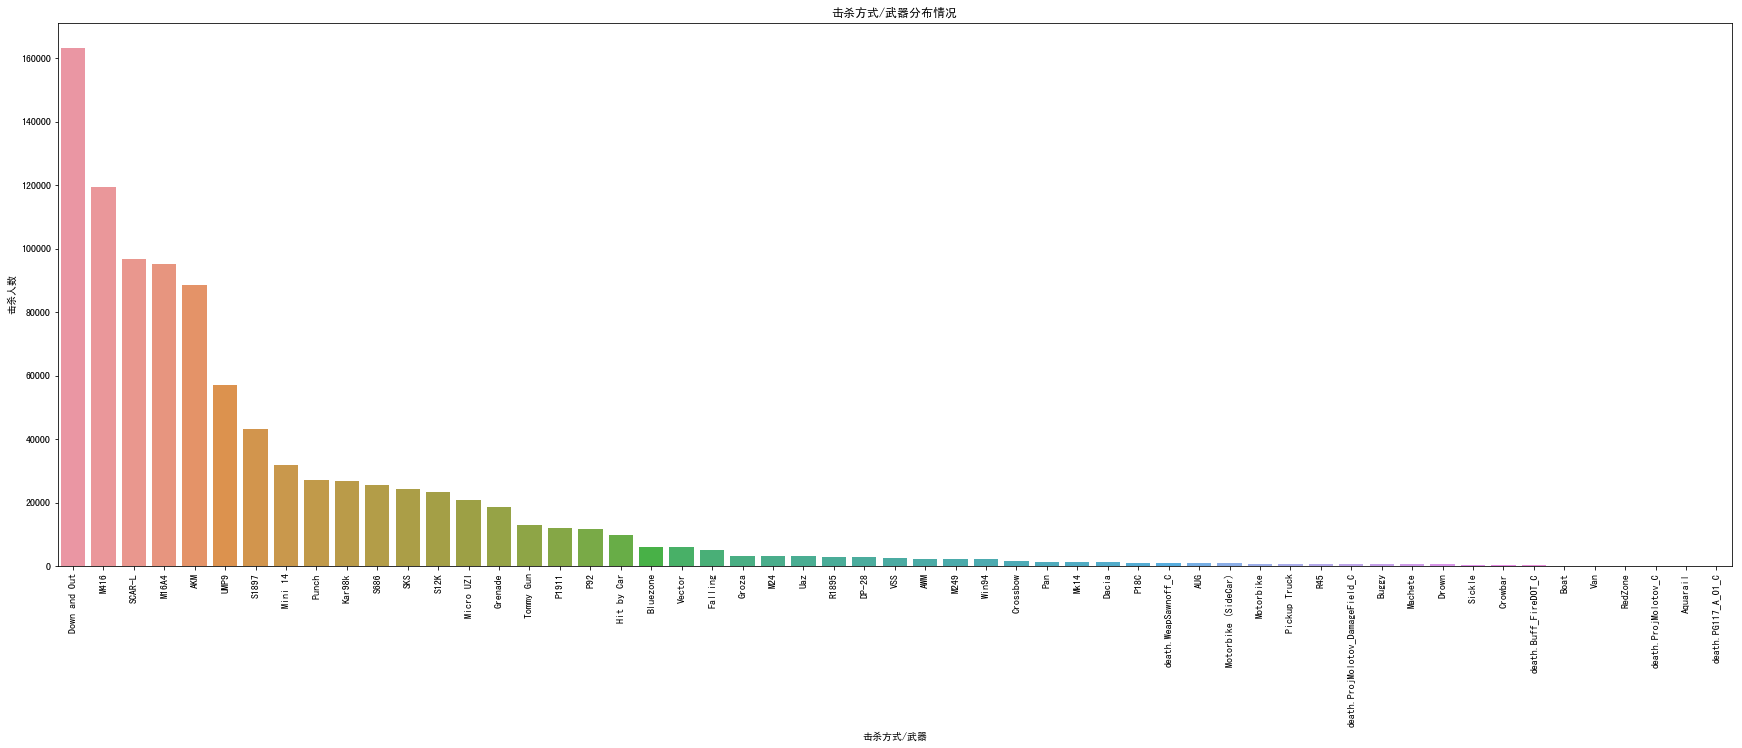

In [17]:
# 击杀原因统计情况
death_pos = kill_data['killed_by'].value_counts()
# 造成击杀人数最多的前20原因
death_pos[:20]
fig = plt.figure(figsize=(30,10))
ax = sns.barplot(y=death_pos.values,x=death_pos.index)
ax.set_ylabel('击杀人数')
ax.set_xlabel('击杀方式/武器')
plt.xticks(rotation=90)
ax.set_title('击杀方式/武器分布情况')
plt.show()

* 根据分析看出，因Down and Out（掉下来摔死）的人数最多，其次是M416（武器）击杀人数最多。
* 需排除掉非武器造成【Down and Out（掉下来摔死）、Punch（拳头）、Hit by Car（被载具撞死）、Bluezone（毒区内死亡），Falling（下降即出局）】的击杀后，重点分析“吃鸡”玩家的主要使用武器。

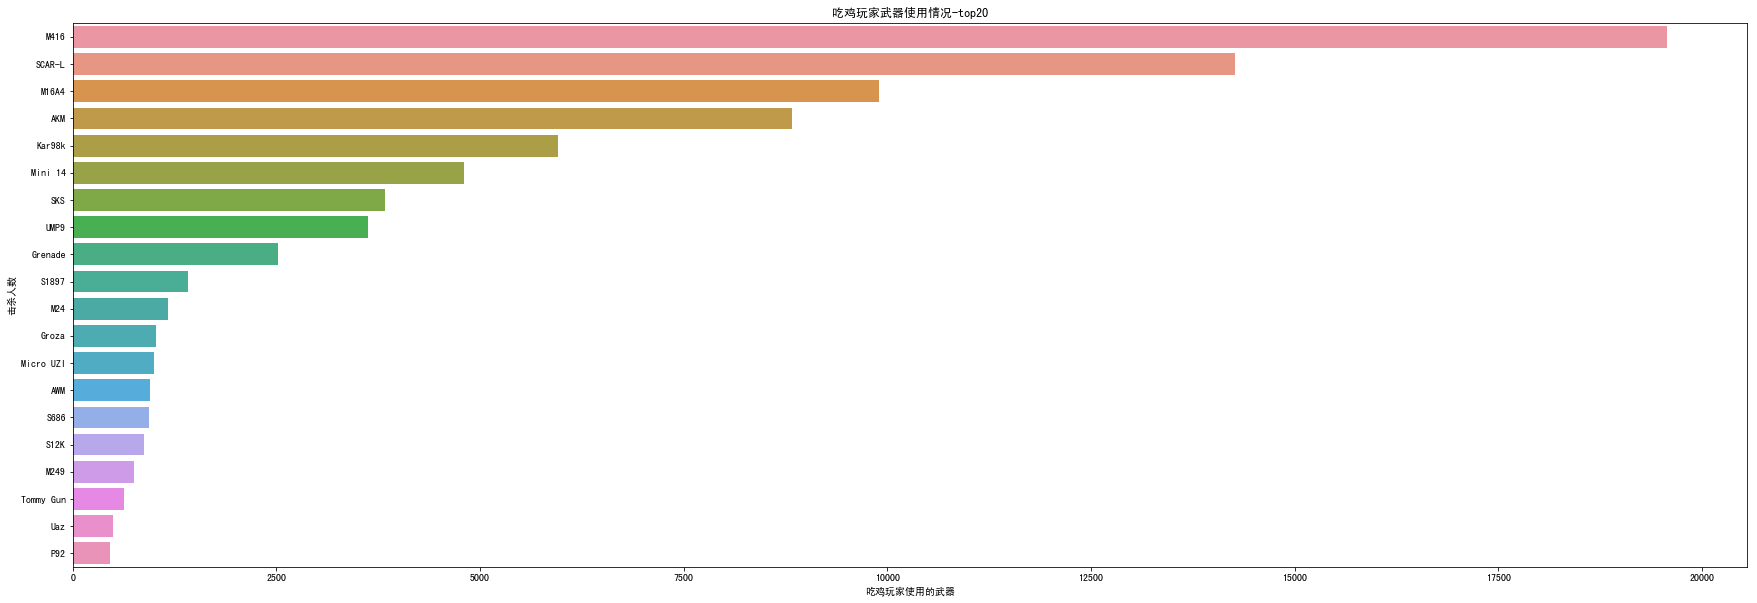

In [18]:
#排除非武器击杀的数据
weapons = death_pos.drop(['Down and Out','Punch','Hit by Car','Bluezone','Falling','Motorbike','Motorbike (SideCar)'])
#筛选出武器造成击杀
weapons_kill = kill_data[kill_data['killed_by'].isin(list(weapons.index))]
#筛选killer_placement=1.0的数据（即击杀者获得最终胜利，成功吃鸡）
win_weapons = weapons_kill[weapons_kill['killer_placement']==1.0]['killed_by'].value_counts()
fig = plt.figure(figsize=(30,10))
ax = sns.barplot(x=win_weapons[:20].values,y=win_weapons[:20].index)
ax.set_ylabel('击杀人数')
ax.set_xlabel('吃鸡玩家使用的武器')
ax.set_title('吃鸡玩家武器使用情况-top20')
plt.show()

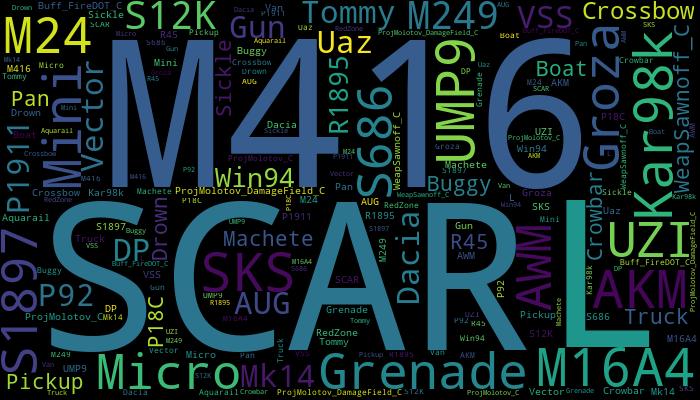

In [19]:
#绘制“吃鸡”玩家们最喜欢使用的武器词云图
from wordcloud import WordCloud
wcd=WordCloud(repeat=True,height=400,width=700,
              max_font_size=None)
# win_weapons['killed_by'].value_counts()
text = str(win_weapons.index.tolist()).replace("'", '').replace('[', '').replace(']', '')
W=text.replace("death", '')
wcd.generate(W)
wcd.to_image()

通过对比发现，吃鸡玩家最喜欢的5种武器：M416、SCAR-L 、M16A4 、AKM、Kar98k，所以，为了能在游戏内成功吃鸡，建议玩家从飞机降落后赶紧去捡这几种枪吧！

既然吃到鸡的玩家带的自动步枪和散弹枪占比多，那是否说明他们优先选择近战，而不是远距离狙击呢？

### 问题3：战斗发生的距离分布

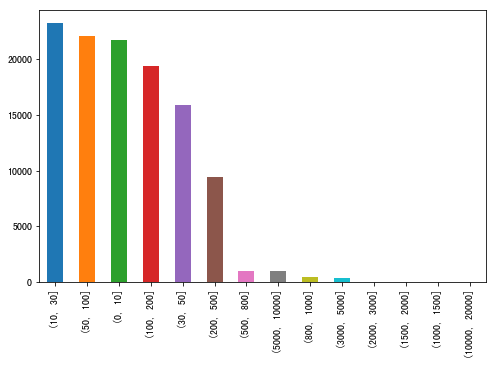

In [20]:
# 筛选出吃到鸡的玩家
win_data = kill_data.loc[(kill_data['killer_placement'] == 1), :]
# 玩家击杀人头的距离分布
distance = np.sqrt(((win_data['killer_position_x'] - win_data['victim_position_x']) / 100) ** 2 + (
        (win_data['killer_position_y'] - win_data['victim_position_y']) / 100) ** 2)
distance = distance.apply(lambda x: int(x))
labels = [0, 10, 30, 50, 100, 200, 500, 800, 1000, 1500, 2000, 3000, 5000, 10000, 20000]
distan_cut = pd.cut(distance, bins=labels)
distan_cut.value_counts().plot.bar(figsize=(8, 5))

分析发现500米内的近战占了大多数，吃到鸡的玩家更偏爱近战，对敌人反应快。而长距离狙击的大神只在少数，比如5000米以上，这些都是熟练操作8倍镜了。

### 问题4：游戏内乘坐交通工具和徒步，哪一种更有利于“吃鸡”？

在交通工具以及步行距离分析前，需要处理掉距离的异常值并划分距离区间，因为不排除“娱乐玩家”开车或步行在游戏里闲逛。
采用1.5倍四分位距（IQR）排除异常值（驾车距离和步行距离数据处理代码类似）：

分析agg_match数据，主要字段：'player_dist_ride' 驾车距离，'player_dist_walk' 徒步距离，'team_placement' 团队排名

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


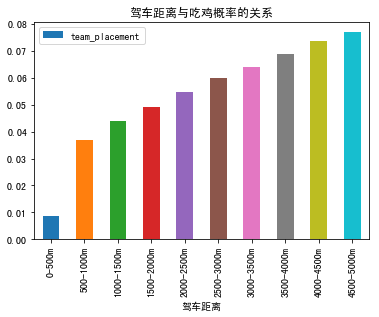

In [21]:
# 处理驾车距离异常值
#驾车距离的平均值
ride_mean = agg_df['player_dist_ride'].mean()
#上四分位数
ride_top_4 = agg_df['player_dist_ride'].quantile(0.75)
#下四分位数
ride_bottom_4 = agg_df['player_dist_ride'].quantile(0.25)
#四分位距
ride_iqr = ride_top_4-ride_bottom_4
ride_top = ride_top_4+1.5*ride_iqr
ride_bottom = ride_bottom_4-1.5*ride_iqr
#大部分玩家的驾车距离在[-2849.50,4749.17]区间内
ride_data = agg_df[agg_df['player_dist_ride'].between(ride_bottom,ride_top)]

# 拆分距离区间
bins = [-1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
labels = ['0-500m','500-1000m','1000-1500m','1500-2000m','2000-2500m','2500-3000m','3000-3500m','3500-4000m','4000-4500m','4500-5000m']
ride_data['驾车距离'] = pd.cut(ride_data['player_dist_ride'],bins,labels=labels)
#统计各个驾车距离的玩家数
all_player = ride_data.groupby('驾车距离').count()
#统计各个驾车距离的吃鸡玩家数
champion_player = ride_data[ride_data['team_placement']==1].groupby('驾车距离').count()
#计算统计各个驾车距离的吃鸡概率
win_rate = champion_player['team_placement']/all_player['team_placement']
win_rate.plot(kind='bar',legend=True,title='驾车距离与吃鸡概率的关系')

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


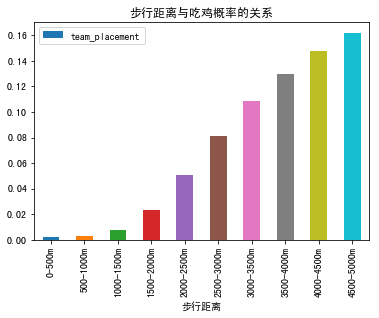

In [22]:
# 处理步行距离异常值
#步行距离的平均值
walk_mean = agg_df['player_dist_walk'].mean()
#上四分位数
walk_top_4 = agg_df['player_dist_walk'].quantile(0.75)
#下四分位数
walk_bottom_4 = agg_df['player_dist_walk'].quantile(0.25)
#四分位距
walk_iqr = walk_top_4-ride_bottom_4
walk_top = walk_top_4+1.5*ride_iqr
walk_bottom = walk_bottom_4-1.5*ride_iqr
#大部分玩家的步行距离在[-2849.50,4749.17]区间内
walk_data = agg_df[agg_df['player_dist_walk'].between(walk_bottom,walk_top)]

# 拆分距离区间
bins = [-1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
labels = ['0-500m','500-1000m','1000-1500m','1500-2000m','2000-2500m','2500-3000m','3000-3500m','3500-4000m','4000-4500m','4500-5000m']
walk_data['步行距离'] = pd.cut(walk_data['player_dist_walk'],bins,labels=labels)
#统计各个步行距离的玩家数
allPlayer = walk_data.groupby('步行距离').count()
#统计各个步行距离的吃鸡玩家数
championPlayer = walk_data[walk_data['team_placement']==1].groupby('步行距离').count()
#计算统计各个步行距离的吃鸡概率
win = championPlayer['team_placement']/allPlayer['team_placement']
win.plot(kind='bar',legend=True,title='步行距离与吃鸡概率的关系')

对比两个柱状图发现，步行距离越远，驾车距离越远，吃鸡概率就越高，但是步行距离总体的吃鸡概率比驾车距离的更低，所以，为了成功吃鸡，除了要跑得快，更加需要交通工具。

### 问题5：击杀数与吃鸡概率的关系

吃鸡游戏中，能活到最后一个就是王者，所以击杀人头越多，吃到鸡的概率并不一定大。那一场游戏里面，击杀多少个敌人吃鸡的概率最高呢？
因此筛选比赛中所有排名第一的玩家，分析他们的击杀敌人数量分布：

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


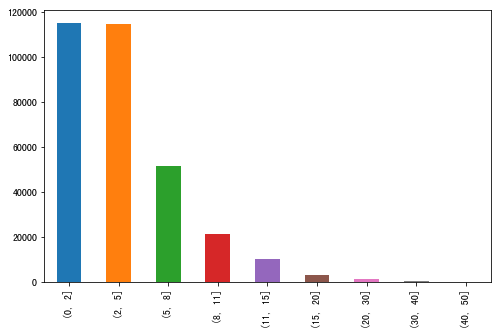

In [23]:
#筛选比赛中所有排名第一的玩家
winer = agg_df.loc[(agg_df['team_placement'] == 1), :]
labels = [0, 2, 5, 8, 11, 15, 20, 30, 40, 50]
winer['kill'] = pd.cut(winer['player_kills'], bins=labels)
winer['assist'] = pd.cut(winer['player_assists'], bins=labels)
winer['kill'].value_counts().plot.bar(figsize=(8, 5))

分析如上图可发现，单场比赛击杀个0~5个的吃鸡获胜玩家占多数，他们并不追求人头，因此猥琐发育也很重要。

### 问题6：游戏最后的毒圈会出现在哪里？

沙漠地图（MIRAMAR）

In [ ]:
image=imread('picture/miramar.jpg')
duquan_mir = kill_data[kill_data['map']=='MIRAMAR']
duquan_era = kill_data[kill_data['map']=='ERANGEL']
#绘制组合图---》由多个图片组成
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(image)
#cmap:核密度估计的方法
sns.kdeplot(duquan_mir['victim_position_x'],duquan_mir['victim_position_y'],shade=True,alphas=0.9,cmap=cm.Reds)

/Users/weiminpang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


<img style="float: left;" src="picture/MIRAMAR.png" width="70%">

经典海岛地图（ERANGEL）

In [ ]:
ima=imread('picture/erangel.jpg')
fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(ima)
sns.kdeplot(duquan_era['victim_position_x'],duquan_era['victim_position_y'],shade=True,alphas=0.9,cmap=cm.Reds)

<img style="float: left;" src="picture/ERANGEL.png" width="70%">

* 在沙漠地图（MIRAMAR）中，分析数据显示，颜色越深，决赛圈出现概率越高，地图上的三处地方决赛圈出现的概率更高：Pekado附近、San Martin、Hacienda Del Patron，玩过游戏的用户都知道，这三处地方因为物资充沛，暗藏杀机，更多的玩家选择在此降落掠夺资源。
* 在经典海岛地图（ERANGEL）中，分析数据显示，颜色越深，决赛圈出现概率越高，决赛圈在军事基地（地图下方）、P城、R城、学校的位置出现概率高，但总体上海岛地图决赛圈几乎在地图的各个位置较高频率出现，一方面海岛地图玩家人数多，另一方面海岛地图相对沙漠图较小。。

## 游戏获胜的模型预测

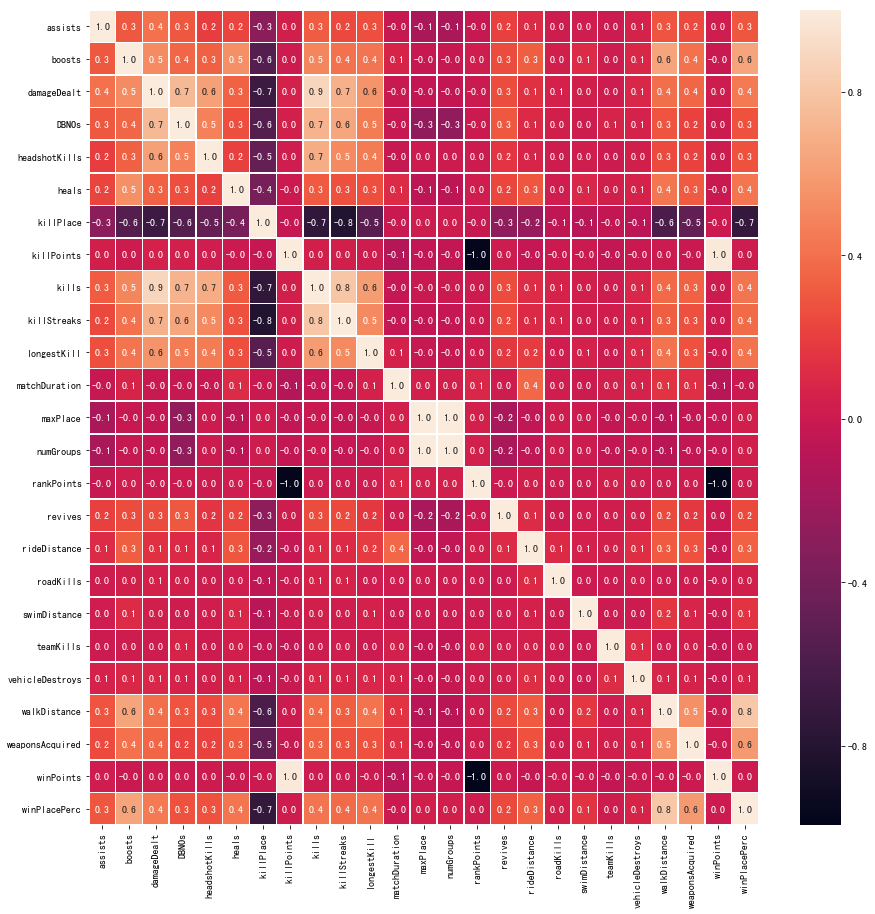

In [24]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

分析相关系数矩阵，发现与获胜排名（winPlacePerc）相关性比较强（相关系数高于±0.4）的字段有： 正相关字段：'boosts'，'damageDealt'，'heals'，'kills'，'longestKill'，'walkDistance' ，'weaponsAcquired' ；负相关：'killPlace'（这里击杀排名越低表示杀人越多，以此与获胜情况呈负相关） ；其中最高正相关是walkDistance，最高负相关是killPlace。

进而分析与目标相关的前5个最正相关的变量：

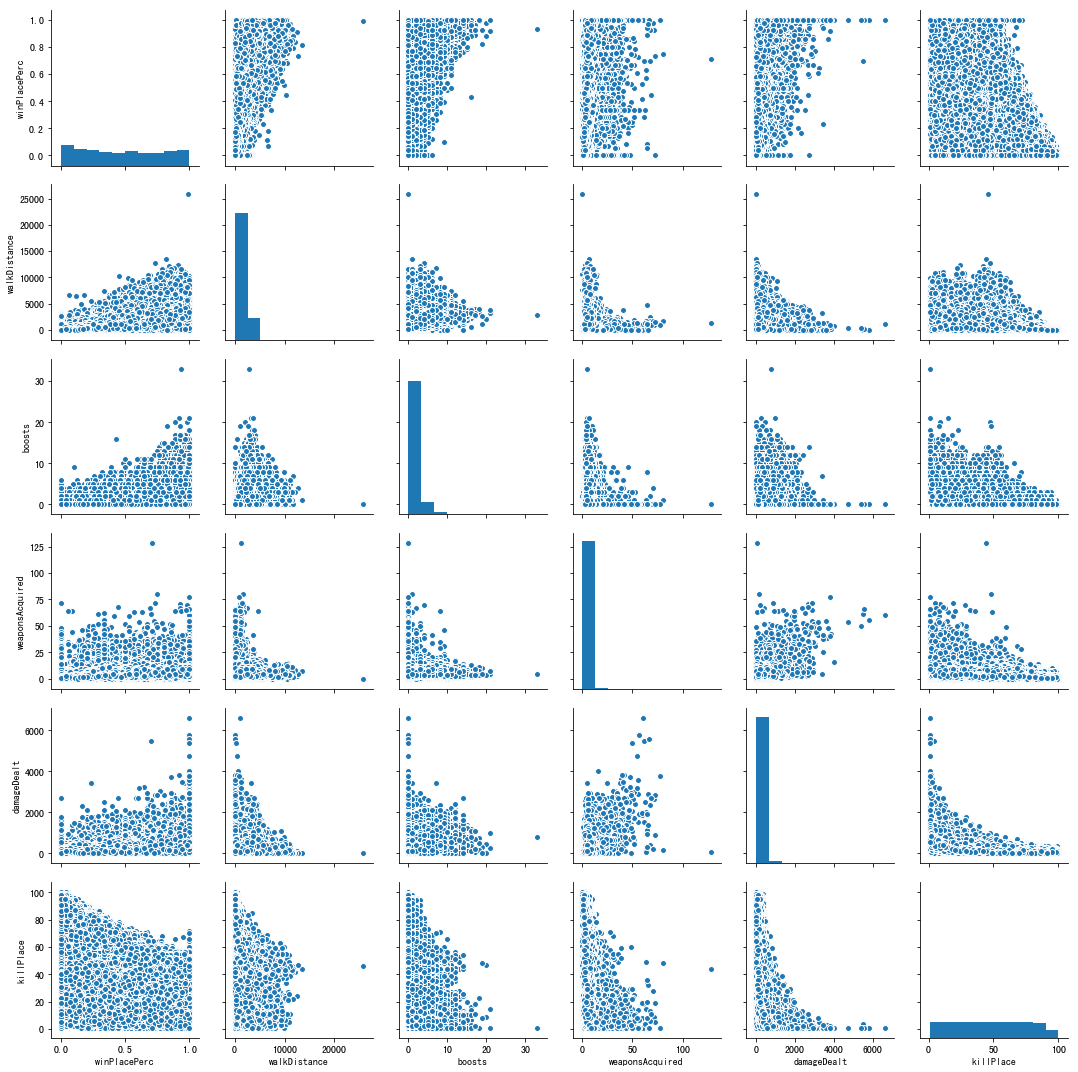

In [28]:
new_data = train_df.loc[:,['winPlacePerc', 'walkDistance', 'boosts', 'weaponsAcquired', 'damageDealt', 'killPlace']]
sns.pairplot(new_data)

# 五.总结与建议

## 总结
* 玩家最喜欢的5种武器：M416、SCAR-L 、M16A4 、AKM、Kar98k。
* 游戏内需要不停地移动才能生存下去，载具能大大提升玩家游戏生存时间。
* 沙漠地图（MIRAMAR）的Hacienda Del Patron、Pekado附近最危险，而经典海岛地图（ERANGEL）的军事基地附近、R城和学校附近落地成盒概率更高，所以，要想在游戏存活更久，这些地方避免跳伞。
* 决赛圈刷新位置与危险区相似，沙漠地图（MIRAMAR）Pekado、San Martin、Hacienda Del Patron三处地方决赛圈刷新比较频繁；而在海岛地图（ERANGEL）中，军事基地（地图下方）、P城、R城、学校的位置出现概率高，但总体上海岛地图决赛圈几乎在地图的各个位置较高频率出现。

## 建议

玩家角度：
* 游戏策略，新手玩家选择低危区域跳伞，采用游击战术，结合载具，边跑边打获取更多的游戏资源，保证长时间存活以及较好的游戏体验。
* 追求刺激的玩家可以选择高危区域跳伞，体验刚枪带来的刺激和紧张，高风险伴随着更多的游戏资源掠取，最终获得游戏第一名。

游戏运营：
* 用户拉新：《绝地求生》游戏主要玩家群体集中在18-30岁，这类用户以学生和在职人士居多，游戏时间多为工作日晚上以及周末，这类群体社交网络使用频繁，可以从社交网络渠道吸引用户点击下载游戏。
* 用户激活：主流游戏登录方式都采用了与社交网络账户关联，减少因注册流程繁琐导致用户在激活游戏前的流失；通过推出新地图、旧地图新玩法等模式，创造更多的“啊哈时刻“，提高用户活跃率。
* 用户留存：越来越多的游戏采用签到获得礼包、推出玩游戏提升礼包等级获得更多的奖励，延长用户的生命周期，这样无论在提高活跃率还是降低用户流失，都产生明显的运营效果。
* 收入转化：《绝地求生》主要靠玩家消费点券创造收入，玩家付费来源主要为人物服装、游戏道具的皮肤、限定服装抽奖等。
* 用户推荐：活跃用户间的相互邀请，分享邀请的主要社交平台为群聊、好友、朋友圈等，这类平台由于使用人数多，因而通过邀请转化为新用户的可能性也高，可以将潜在玩家转化为新增玩家，提高转发率、K因子指标。